In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

data = pd.read_csv("CC GENERAL.csv")

data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

CUST_ID: Unique identifier for each customer.

BALANCE: The current balance amount in the account.

BALANCE_FREQUENCY: Frequency of updating the balance.

PURCHASES: Total amount of purchases made.

ONEOFF_PURCHASES: Amount of purchases made in one go.

INSTALLMENTS_PURCHASES: Amount of purchases made in installments.

CASH_ADVANCE: Cash advances taken from the account.

PURCHASES_FREQUENCY: Frequency of purchases.

ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off purchases.

PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases.

CASH_ADVANCE_FREQUENCY: Frequency of cash advances.

CASH_ADVANCE_TRX: Number of transactions involving cash advances.

PURCHASES_TRX: Number of purchase transactions made.

CREDIT_LIMIT: Limit of credit on the account.

PAYMENTS: Total payments done by the customer.

MINIMUM_PAYMENTS: Minimum payments due from the customer.

PRC_FULL_PAYMENT: Percentage of the full payment paid by the customer.

TENURE: Duration of account tenure with the bank.

In [3]:
features = list(data.columns)
n_features = len(features)
n_samples = len(data)

print(f"Number of features : {n_features}")
print(f"Number of Samples  : {n_samples}")
print("Features  : ")
for index, feature in enumerate(features):
    print(f"{index+1:2}. {feature}")

Number of features : 18
Number of Samples  : 8950
Features  : 
 1. CUST_ID
 2. BALANCE
 3. BALANCE_FREQUENCY
 4. PURCHASES
 5. ONEOFF_PURCHASES
 6. INSTALLMENTS_PURCHASES
 7. CASH_ADVANCE
 8. PURCHASES_FREQUENCY
 9. ONEOFF_PURCHASES_FREQUENCY
10. PURCHASES_INSTALLMENTS_FREQUENCY
11. CASH_ADVANCE_FREQUENCY
12. CASH_ADVANCE_TRX
13. PURCHASES_TRX
14. CREDIT_LIMIT
15. PAYMENTS
16. MINIMUM_PAYMENTS
17. PRC_FULL_PAYMENT
18. TENURE


In [4]:
data.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [5]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

data['MINIMUM_PAYMENTS'].fillna(int(data['MINIMUM_PAYMENTS'].mean()),inplace=True)

In [11]:
simple_imputer = SimpleImputer(strategy="mean")
data.MINIMUM_PAYMENTS = simple_imputer.fit_transform(data.MINIMUM_PAYMENTS.to_numpy().reshape(-1,1))

# Confirmation of the Imputation
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
data_copy = data.copy()
data_copy.drop(columns = 'CUST_ID', inplace = True)

In [16]:
norm_data = normalize(data_copy)

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(norm_data)

# Final dataset
scaled_data

array([[-0.9418589 ,  2.51351895, -0.36811698, ..., -0.02637805,
        -0.38761659,  3.01516256],
       [ 0.22152701, -0.74991997, -0.92500711, ..., -0.25090963,
        -0.20776637, -0.79553516],
       [ 0.29887531, -0.55916806, -0.34071246, ..., -0.37793698,
        -0.38761659, -0.65195208],
       ...,
       [-1.01764362,  2.62400729, -0.0723584 , ..., -0.36490662,
         1.75829814,  0.93323231],
       [-1.00049826,  6.47911281, -0.92500711, ..., -0.17891966,
         3.95805132,  3.11721441],
       [-0.26970397,  0.40931793,  2.39229148, ..., -0.59088656,
        -0.38761659, -0.10245973]])

In [18]:
def hist(feature, data_frame):
   
    fig = px.histogram(
        data_frame=data_frame,
        x=feature,
        title="{} Histogram".format(feature.title()),
        text_auto=True,
        marginal="rug",
        height=500
    )
    fig.show()

def box(feature, data_frame):
   
    fig = px.box(
        data_frame=data_frame,
        x=feature,
        title="{} Box Plot".format(feature.title()),
        notched=True,
        height=500
    )
    fig.show()


def violin(feature, data_frame):
   
    fig = px.violin(
        data_frame=data_frame,
        x=feature,
        title="{} Violin Plot".format(feature.title()),
        height=500,
    )
    fig.show()


def feature_analysis(index, data_frame = data):
    
    hist(features[index], data_frame)
    box(features[index], data_frame)
    violin(features[index], data_frame)

In [19]:
feature_analysis(1)

In [20]:
feature_analysis(2)

In [21]:
feature_analysis(9)

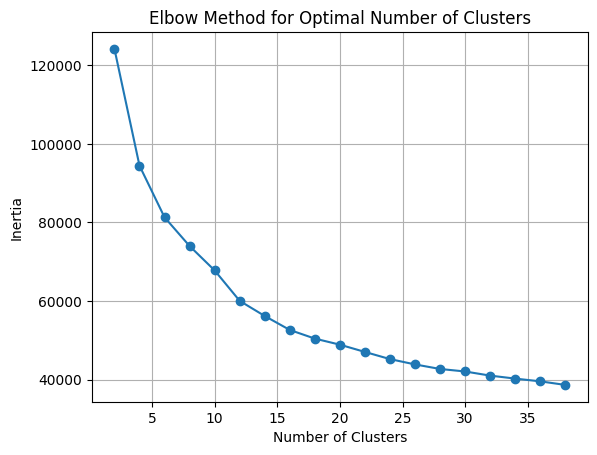

In [22]:
num_clusters_range = range(2, 40, 2)

inertia_values = []


for num_clusters in num_clusters_range:
    k_means = KMeans(
        n_clusters = num_clusters,
        random_state = 42,
        n_init = "auto"
    )
    k_means.fit(scaled_data)
    inertia_values.append(k_means.inertia_)

plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

10-12 en iyisi gibi görünüyor


silhouette_score sckit learn içerisinde

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

yellow brick

from yellowbrick.cluster import KElbowVisaulizer



In [23]:
k_means = KMeans(
    n_clusters = 12,
    n_init = 'auto',
    random_state = 42
)

# Fit / Train the model
k_means.fit(scaled_data)

KMeans(n_clusters=12, n_init='auto', random_state=42)

In [24]:
cluster_labels = k_means.labels_

tsne = TSNE(
    n_components=3,
    random_state=42
)
tsne_result = tsne.fit_transform(scaled_data)

In [25]:
tsne = TSNE(
    n_components=2,
    random_state=42
)
tsne_result_2d = tsne.fit_transform(scaled_data)

In [26]:
tsne_3d_fig = px.scatter_3d(
    x = tsne_result[:, 0],
    y = tsne_result[:, 1],
    z = tsne_result[:, 2],
    color = cluster_labels,
    title = "t-SNE Cluster Visualization"
)
tsne_3d_fig.show()

In [27]:
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = cluster_labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()

In [28]:
k_means = KMeans(
    n_clusters = 10,
    n_init = 'auto',
    random_state = 42
)

# Fit / Train the model
k_means.fit(scaled_data)

KMeans(n_clusters=10, n_init='auto', random_state=42)

In [29]:
cluster_labels = k_means.labels_

tsne = TSNE(
    n_components=3,
    random_state=42
)
tsne_result = tsne.fit_transform(scaled_data)

In [30]:
tsne = TSNE(
    n_components=2,
    random_state=42
)
tsne_result_2d = tsne.fit_transform(scaled_data)

In [31]:
tsne_3d_fig = px.scatter_3d(
    x = tsne_result[:, 0],
    y = tsne_result[:, 1],
    z = tsne_result[:, 2],
    color = cluster_labels,
    title = "t-SNE Cluster Visualization"
)
tsne_3d_fig.show()

In [32]:
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = cluster_labels,
    title = "t-SNE Cluster Visualization (2D)"
)
tsne_2d_fig.show()